In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
#Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_df = pd.read_parquet("train_data_2.2.parquet")
combined_df

,taxi_zone,datetime,passenger_count,year_month,week,hour,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01 00:00:00,0,2022-01,5,0,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
1,1,2022-01-01 01:00:00,0,2022-01,5,1,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
2,1,2022-01-01 02:00:00,2,2022-01,5,2,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
3,1,2022-01-01 03:00:00,1,2022-01,5,3,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
4,1,2022-01-01 04:00:00,8,2022-01,5,4,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,263,2023-04-30 19:00:00,247,2023-04,6,19,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038036,263,2023-04-30 20:00:00,242,2023-04,6,20,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038037,263,2023-04-30 21:00:00,210,2023-04,6,21,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038038,263,2023-04-30 22:00:00,152,2023-04,6,22,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No


In [3]:
combined_df.dtypes

taxi_zone                                   int64
datetime                           datetime64[ns]
passenger_count                             int64
year_month                              period[M]
week                                        int32
hour                                        int32
borough                                    object
entertainment_and_recreation                int64
financial_services                          int64
food_and_beverage                           int64
parking_and_automotive_services             int64
professional_services                       int64
real_estate                                 int64
retail_services                             int64
transportation                              int64
hospital                                    int64
hotspots                                    int64
school                                      int64
total_business                              int64
holiday                                    object


In [4]:
 # check null value
combined_df.isnull().sum()

taxi_zone                          0
datetime                           0
passenger_count                    0
year_month                         0
week                               0
hour                               0
borough                            0
entertainment_and_recreation       0
financial_services                 0
food_and_beverage                  0
parking_and_automotive_services    0
professional_services              0
real_estate                        0
retail_services                    0
transportation                     0
hospital                           0
hotspots                           0
school                             0
total_business                     0
holiday                            0
dtype: int64

In [5]:
# set categorical types
combined_df['taxi_zone'] = combined_df['taxi_zone'].astype('category')
combined_df['year_month'] = combined_df['year_month'].astype('category')
combined_df['week'] = combined_df['week'].astype('category')
combined_df['hour'] = combined_df['hour'].astype('category')
combined_df['borough'] = combined_df['borough'].astype('category')
combined_df['holiday'] = combined_df['holiday'].astype('category')
category_columns = combined_df.select_dtypes(['category']).columns
category_columns

Index(['taxi_zone', 'year_month', 'week', 'hour', 'borough', 'holiday'], dtype='object')

In [6]:
#update all columns of type 'numeric'
numeric_columns = combined_df.select_dtypes(['float64', 'int']).columns
numeric_columns

Index(['passenger_count', 'entertainment_and_recreation', 'financial_services',
       'food_and_beverage', 'parking_and_automotive_services',
       'professional_services', 'real_estate', 'retail_services',
       'transportation', 'hospital', 'hotspots', 'school', 'total_business'],
      dtype='object')

In [7]:
combined_df.dtypes

taxi_zone                                category
datetime                           datetime64[ns]
passenger_count                             int64
year_month                               category
week                                     category
hour                                     category
borough                                  category
entertainment_and_recreation                int64
financial_services                          int64
food_and_beverage                           int64
parking_and_automotive_services             int64
professional_services                       int64
real_estate                                 int64
retail_services                             int64
transportation                              int64
hospital                                    int64
hotspots                                    int64
school                                      int64
total_business                              int64
holiday                                  category


In [8]:
combined_df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,3038040.0,48.165777,130.546261,0.0,0.0,2.0,15.0,2341.0
entertainment_and_recreation,3038040.0,8.671996,14.840856,0.0,0.0,2.0,11.0,98.0
financial_services,3038040.0,1.457185,2.510355,0.0,0.0,1.0,2.0,32.0
food_and_beverage,3038040.0,0.154465,0.497392,0.0,0.0,0.0,0.0,5.0
parking_and_automotive_services,3038040.0,17.662086,14.941655,0.0,6.0,14.0,26.0,83.0
professional_services,3038040.0,13.700843,14.936738,0.0,3.0,10.0,19.0,97.0
real_estate,3038040.0,89.151752,103.141589,0.0,20.0,55.0,118.0,733.0
retail_services,3038040.0,82.706451,66.432500,0.0,35.0,73.0,113.0,335.0
transportation,3038040.0,2.874114,7.691866,0.0,0.0,0.0,2.0,87.0
hospital,3038040.0,0.298851,0.859229,0.0,0.0,0.0,0.0,7.0


array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'entertainment_and_recreation'}>,
        <Axes: title={'center': 'financial_services'}>,
        <Axes: title={'center': 'food_and_beverage'}>],
       [<Axes: title={'center': 'parking_and_automotive_services'}>,
        <Axes: title={'center': 'professional_services'}>,
        <Axes: title={'center': 'real_estate'}>,
        <Axes: title={'center': 'retail_services'}>],
       [<Axes: title={'center': 'transportation'}>,
        <Axes: title={'center': 'hospital'}>,
        <Axes: title={'center': 'hotspots'}>,
        <Axes: title={'center': 'school'}>],
       [<Axes: title={'center': 'total_business'}>, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

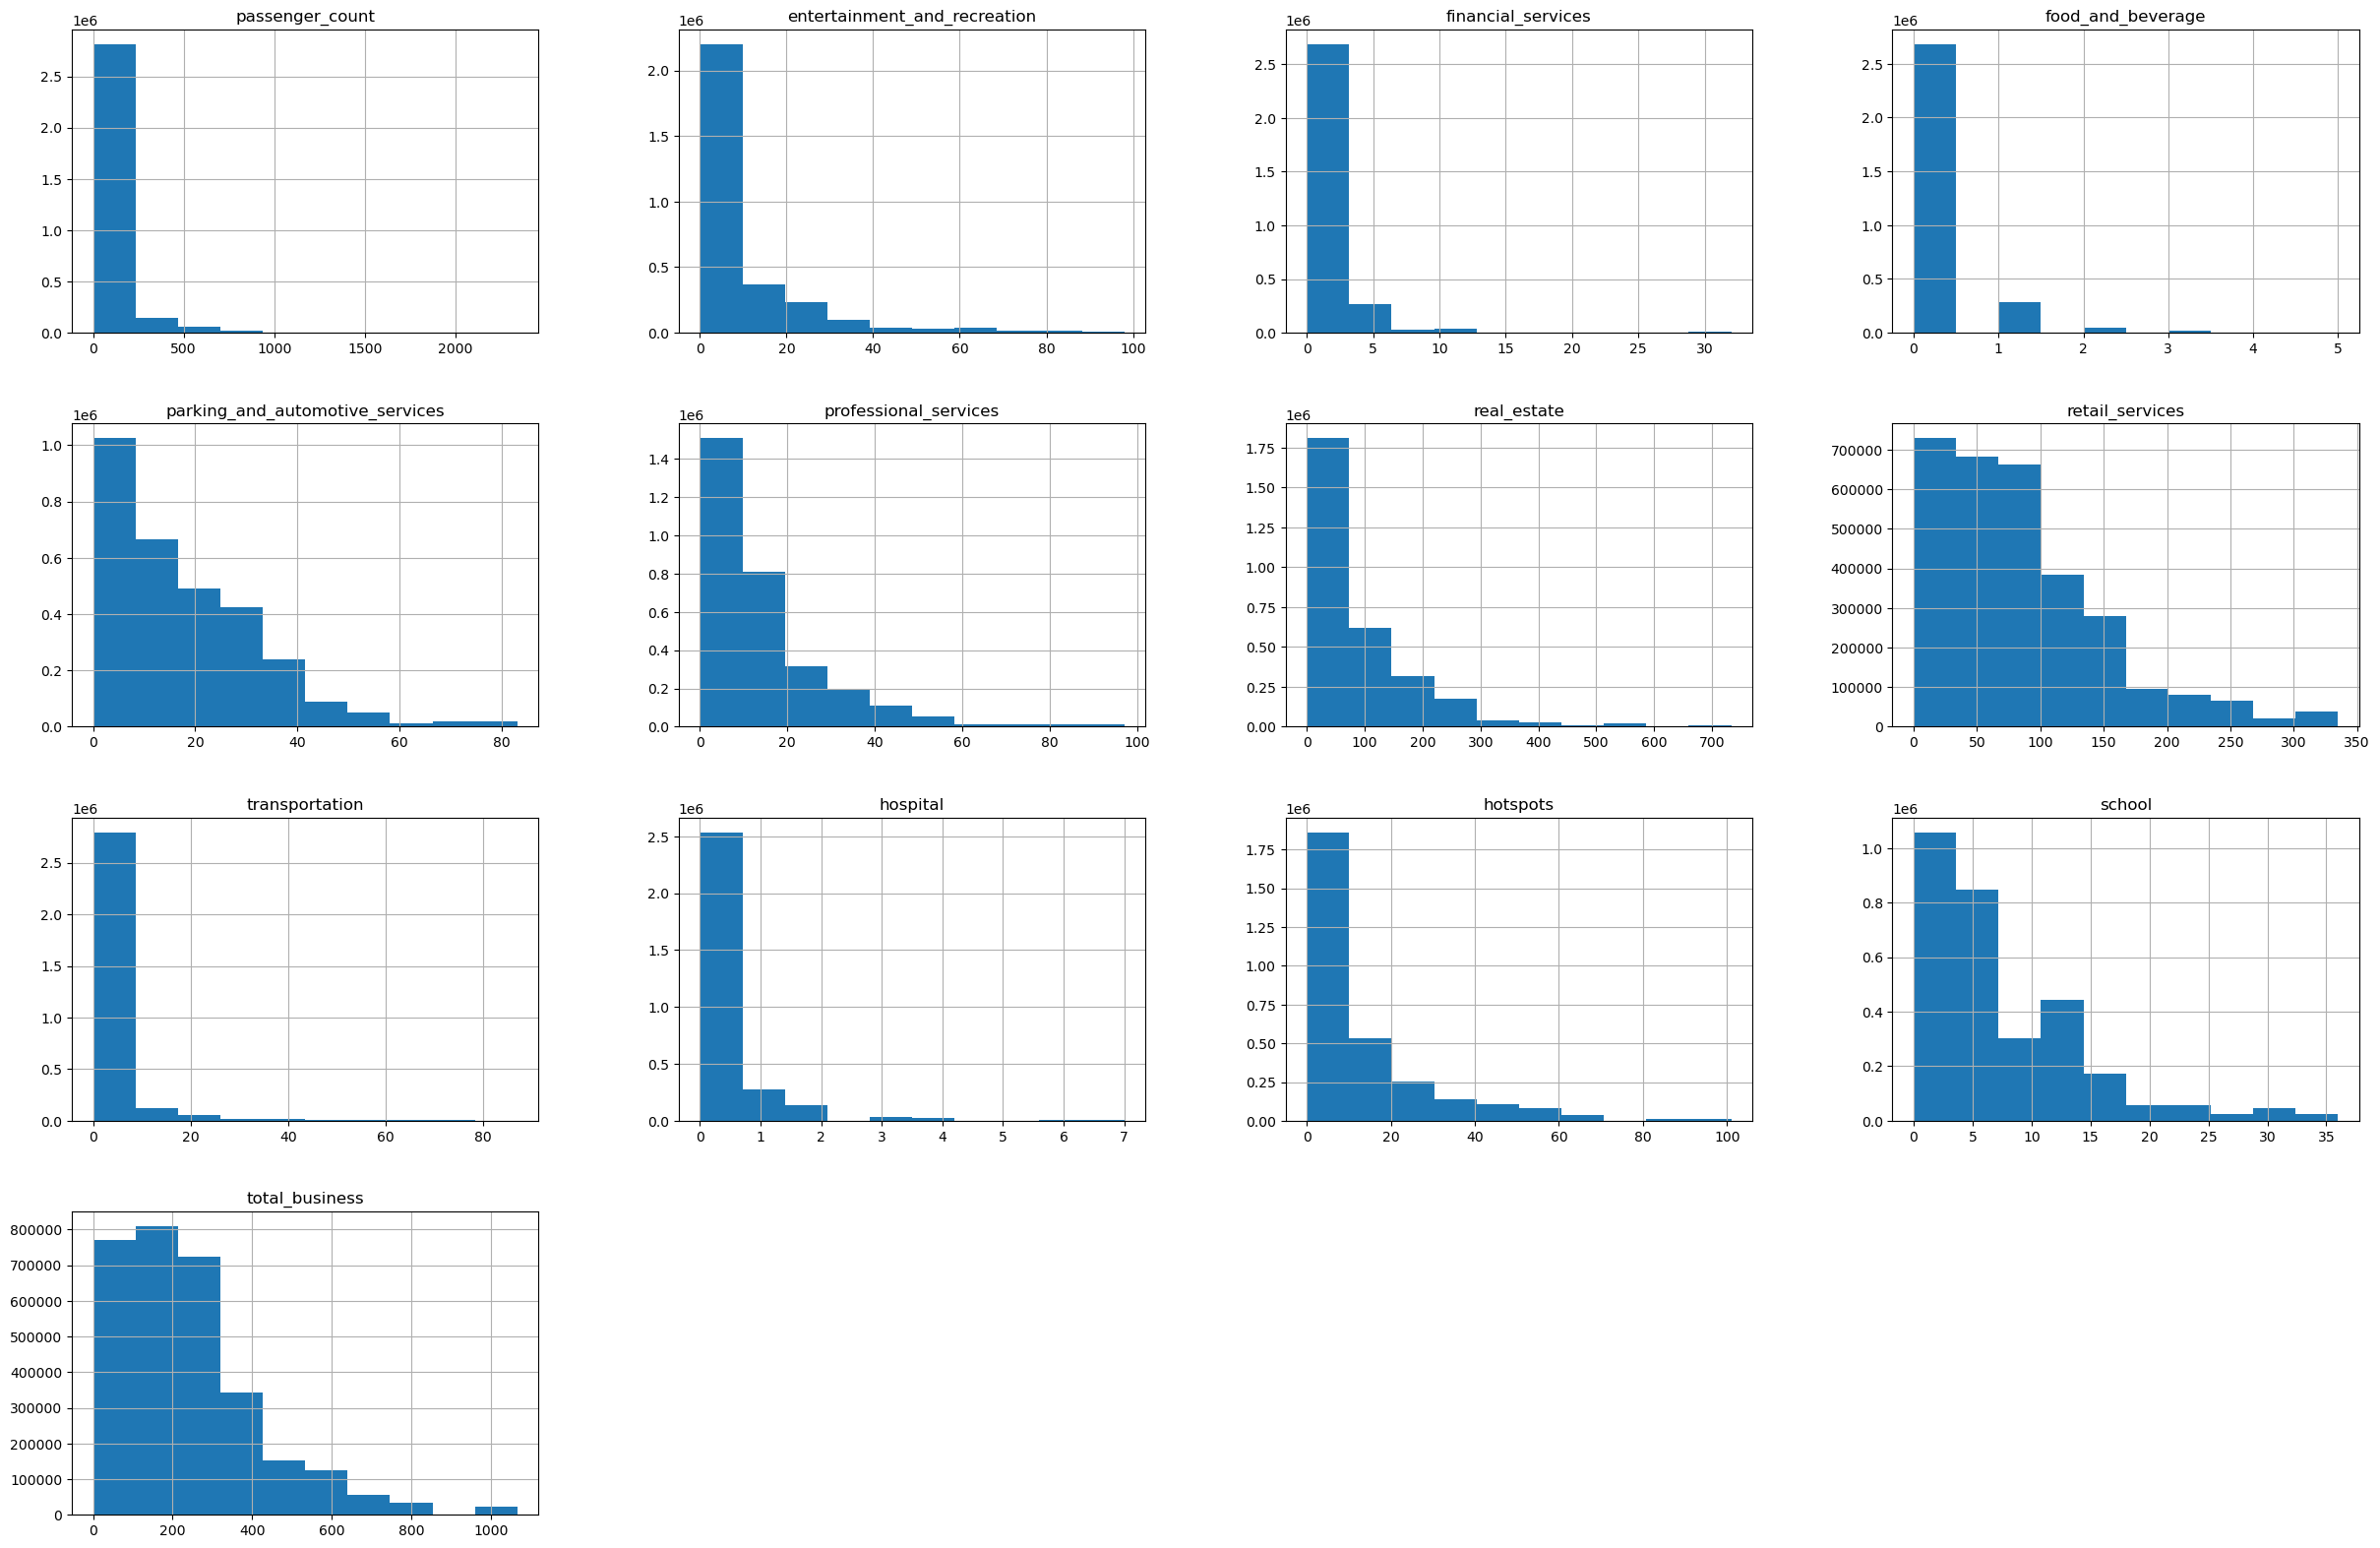

In [9]:
# Plot a histogram summary sheet of the continuous features and save in a png file
combined_df[numeric_columns].hist(layout=(6, 4), figsize=(30,30), bins=10)
# plt.savefig('continuous_histograms_1-1.pdf')

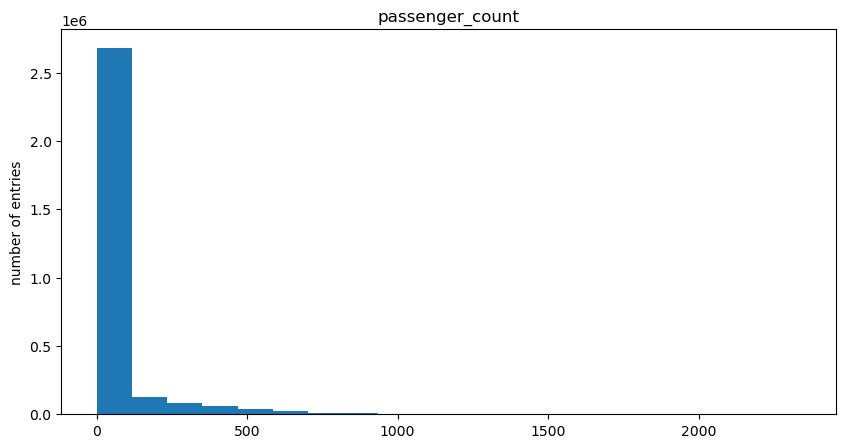

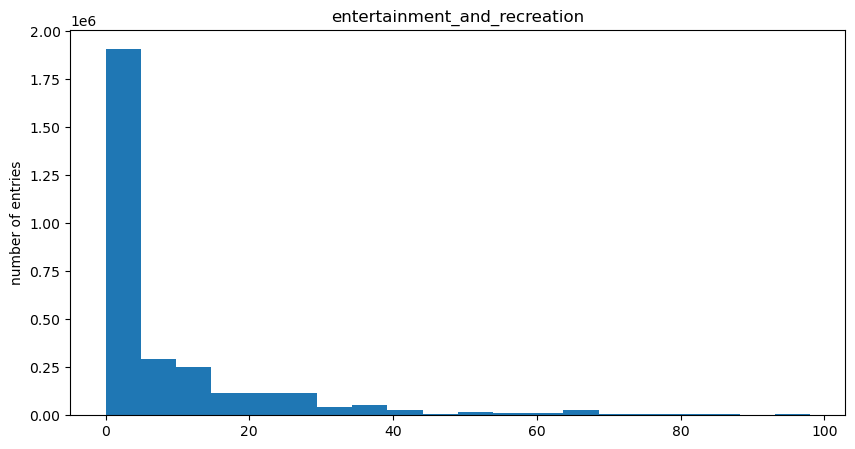

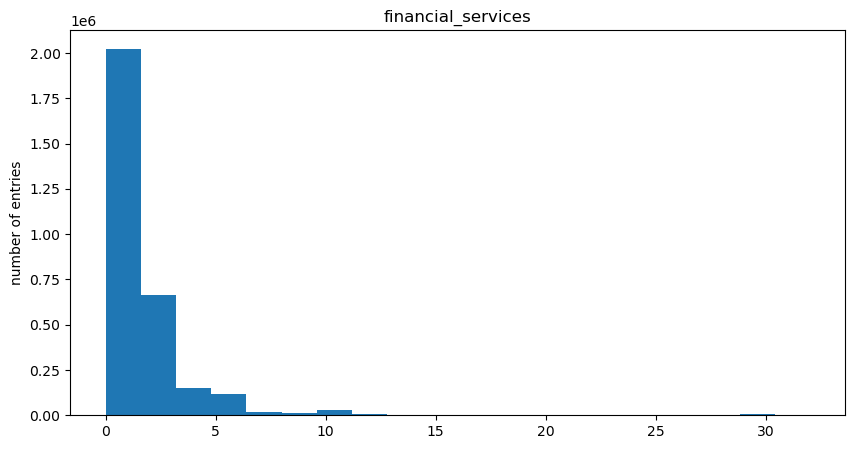

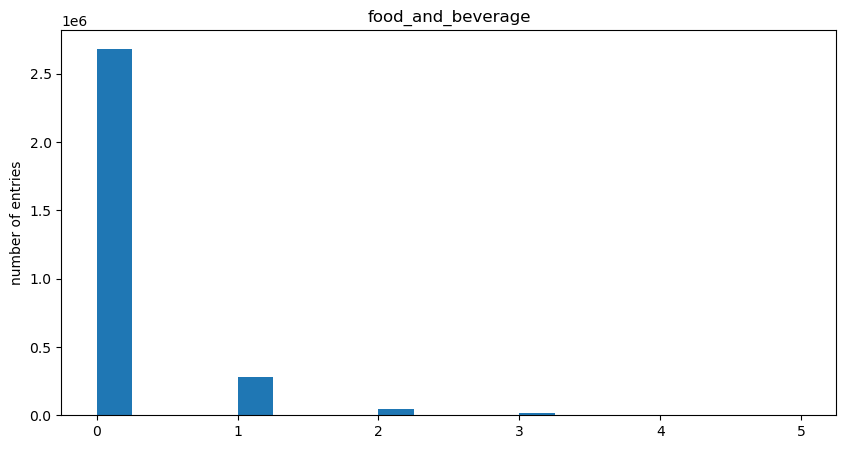

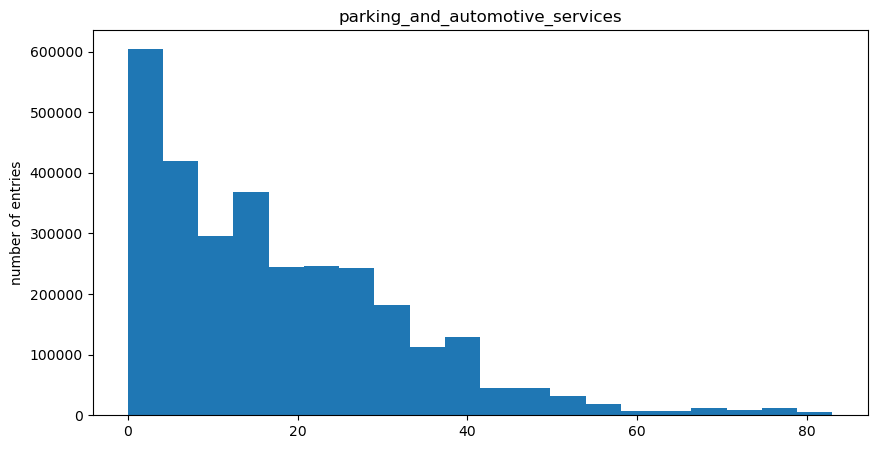

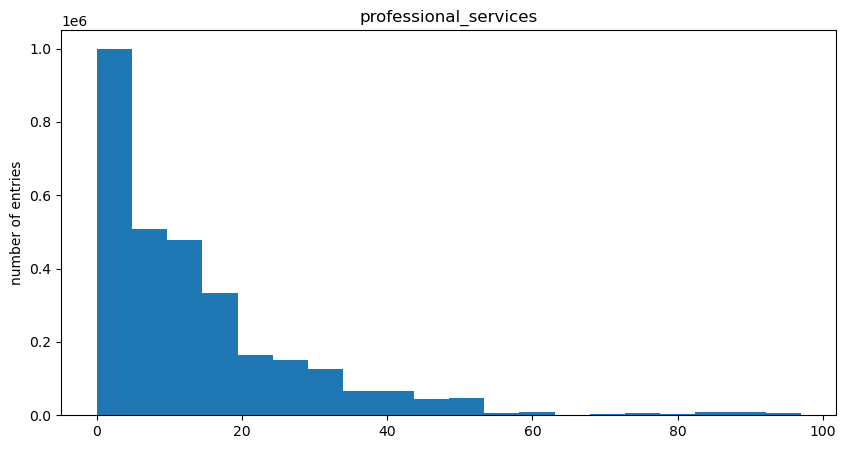

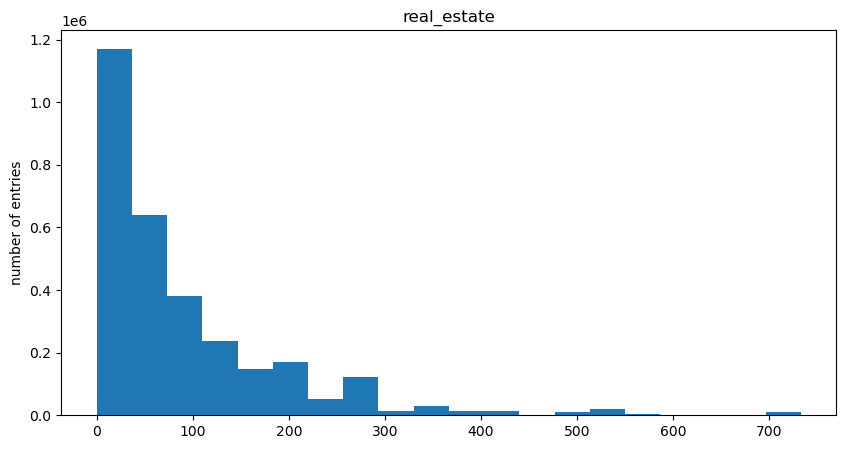

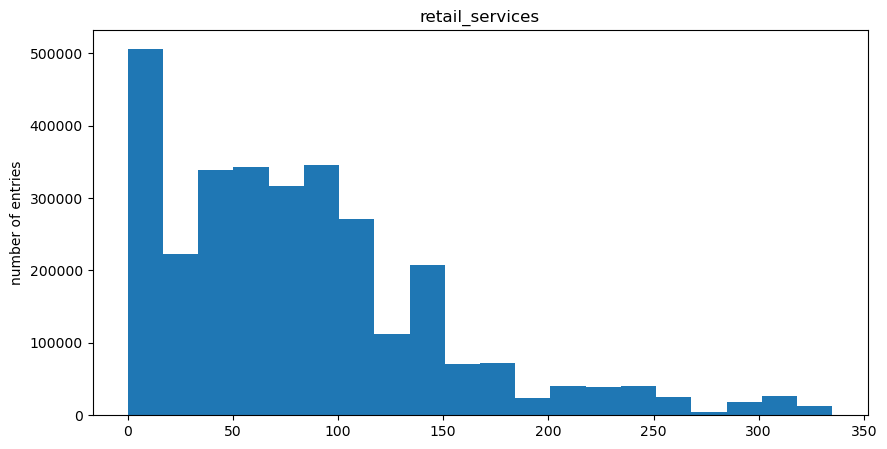

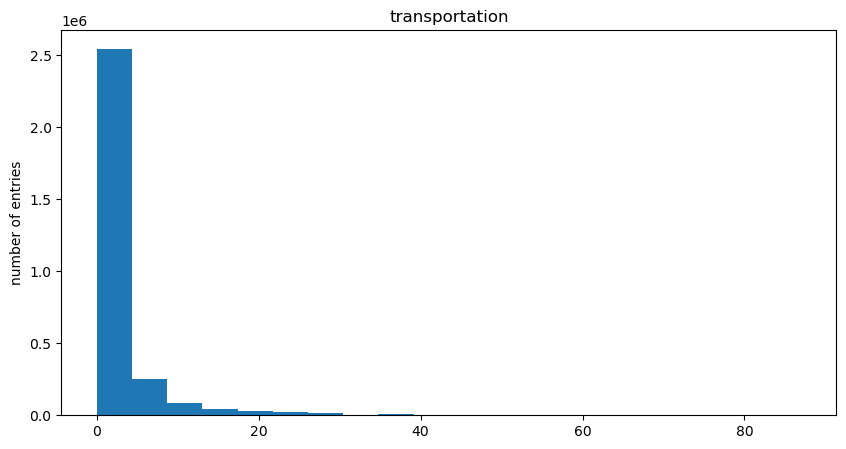

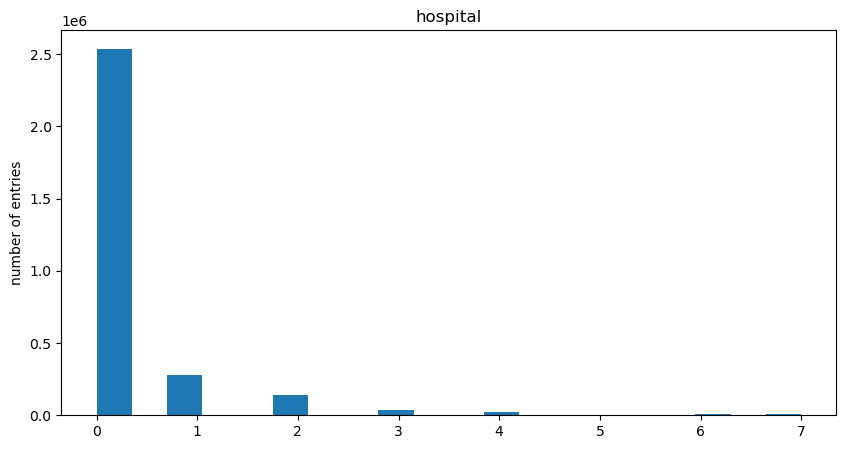

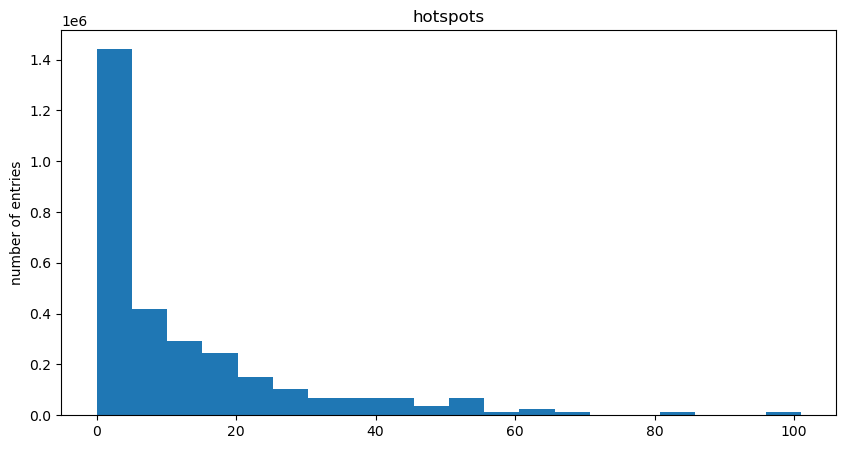

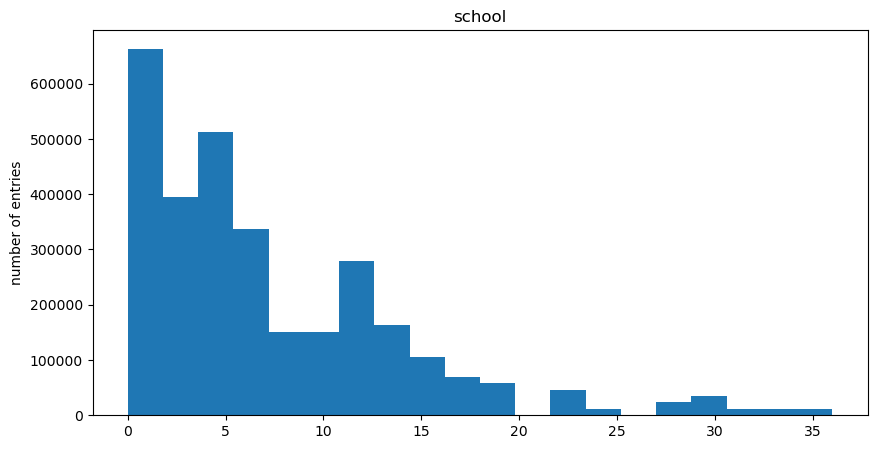

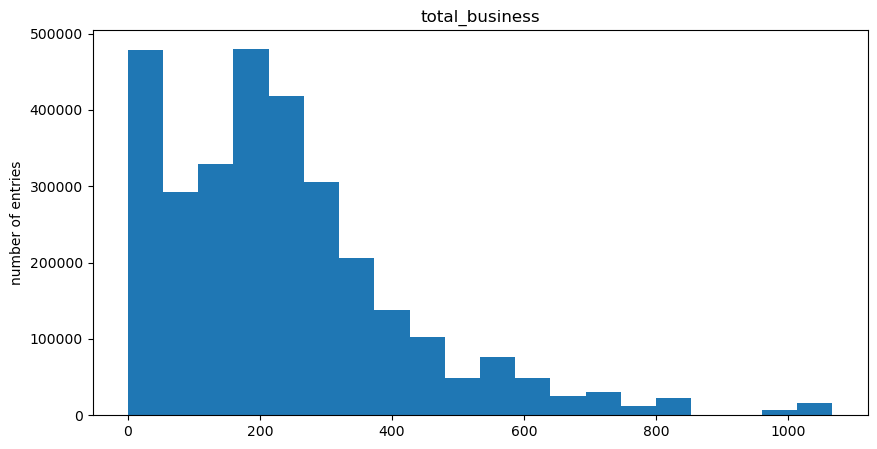

In [10]:
for col in numeric_columns:
        f = combined_df[col].plot(kind='hist', figsize=(10,5), bins=20)
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()  

passenger_count                        Axes(0.125,0.77;0.168478x0.11)
entertainment_and_recreation        Axes(0.327174,0.77;0.168478x0.11)
financial_services                  Axes(0.529348,0.77;0.168478x0.11)
food_and_beverage                   Axes(0.731522,0.77;0.168478x0.11)
parking_and_automotive_services       Axes(0.125,0.638;0.168478x0.11)
professional_services              Axes(0.327174,0.638;0.168478x0.11)
real_estate                        Axes(0.529348,0.638;0.168478x0.11)
retail_services                    Axes(0.731522,0.638;0.168478x0.11)
transportation                        Axes(0.125,0.506;0.168478x0.11)
hospital                           Axes(0.327174,0.506;0.168478x0.11)
hotspots                           Axes(0.529348,0.506;0.168478x0.11)
school                             Axes(0.731522,0.506;0.168478x0.11)
total_business                        Axes(0.125,0.374;0.168478x0.11)
dtype: object

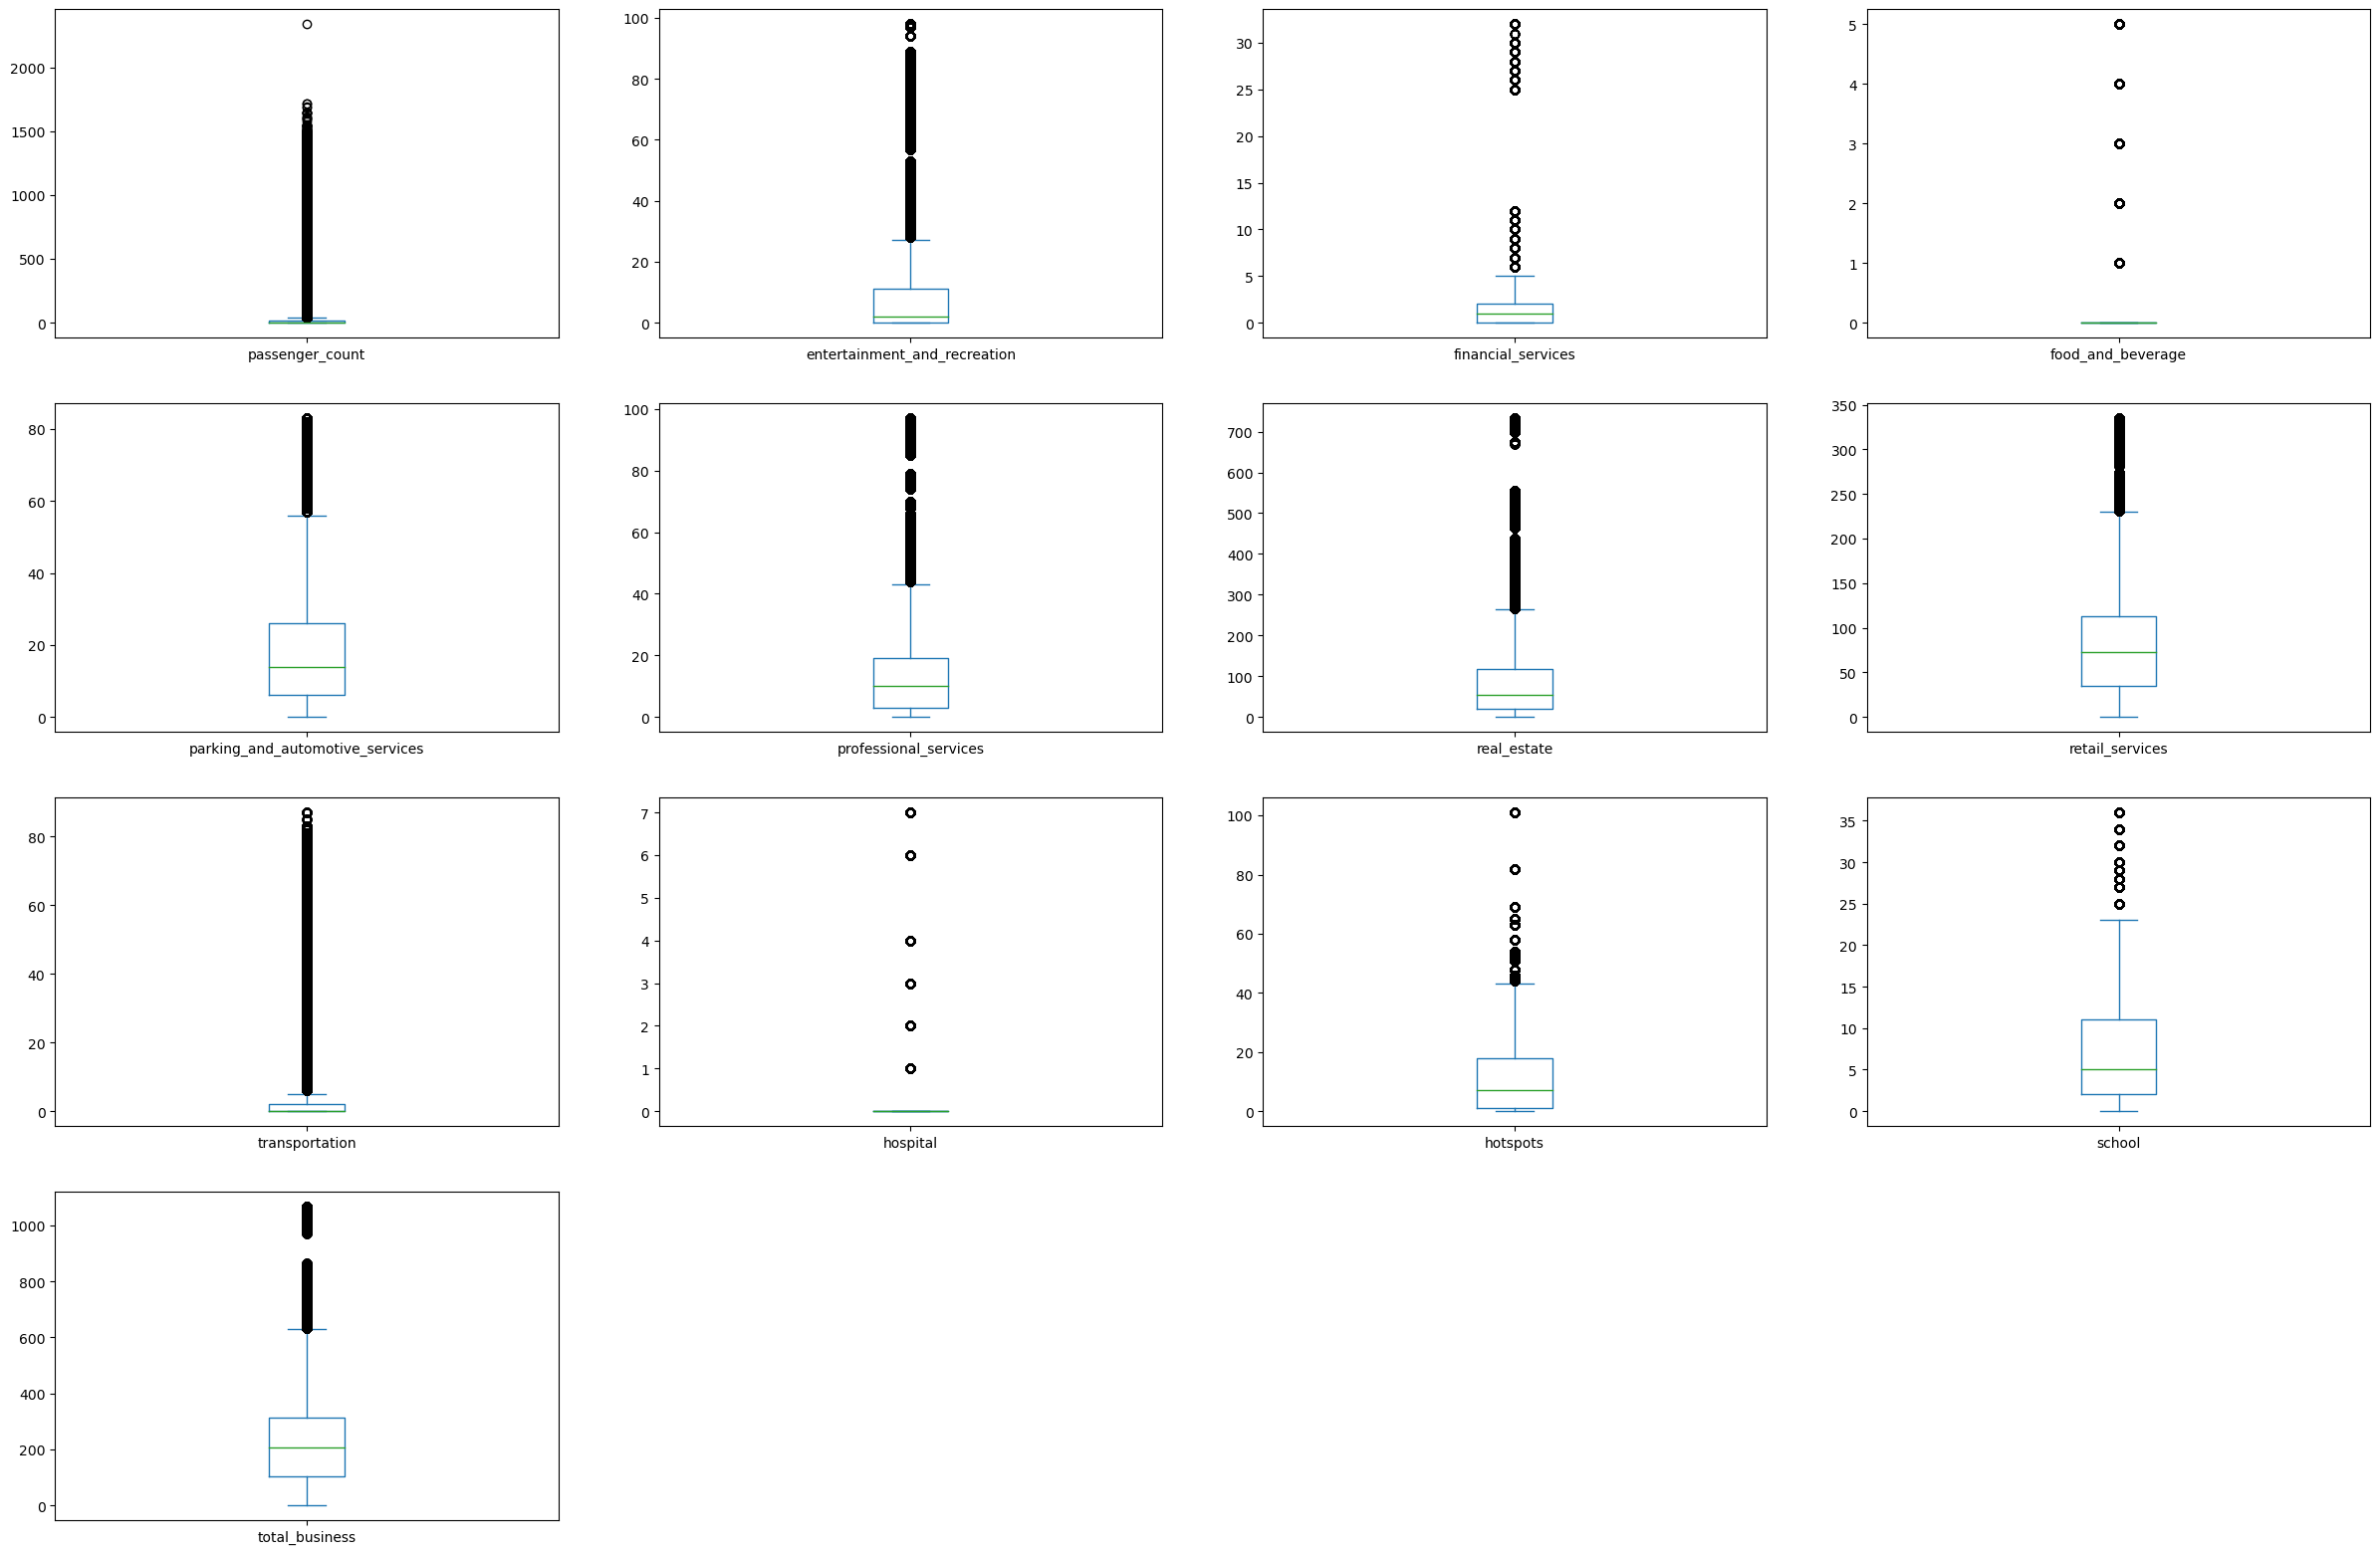

In [11]:
combined_df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
# plt.savefig('continuous_boxplots.pdf')


In [12]:
cols_to_avg = ['taxi_zone', 'hour', 'passenger_count', 'entertainment_and_recreation', 
               'financial_services', 'food_and_beverage', 'parking_and_automotive_services', 
               'professional_services', 'real_estate', 'retail_services', 'transportation', 
               'hospital', 'hotspots', 'school',
               'total_business']

grouped_taxi_hour = combined_df[cols_to_avg].groupby(['taxi_zone', 'hour']).mean().reset_index()
grouped_taxi_hour.head(3000)

,taxi_zone,hour,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,1,0,1.088660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000
1,1,1,0.956701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000
2,1,2,1.059794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000
3,1,3,3.340206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000
4,1,4,10.084536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,127,19,8.020619,25.938144,2.245361,0.717526,18.197938,18.115464,31.164948,98.131959,1.0,1.0,2.0,11.0,209.51134
2996,127,20,8.494845,25.938144,2.245361,0.717526,18.197938,18.115464,31.164948,98.131959,1.0,1.0,2.0,11.0,209.51134
2997,127,21,9.202062,25.938144,2.245361,0.717526,18.197938,18.115464,31.164948,98.131959,1.0,1.0,2.0,11.0,209.51134
2998,127,22,11.032990,25.938144,2.245361,0.717526,18.197938,18.115464,31.164948,98.131959,1.0,1.0,2.0,11.0,209.51134


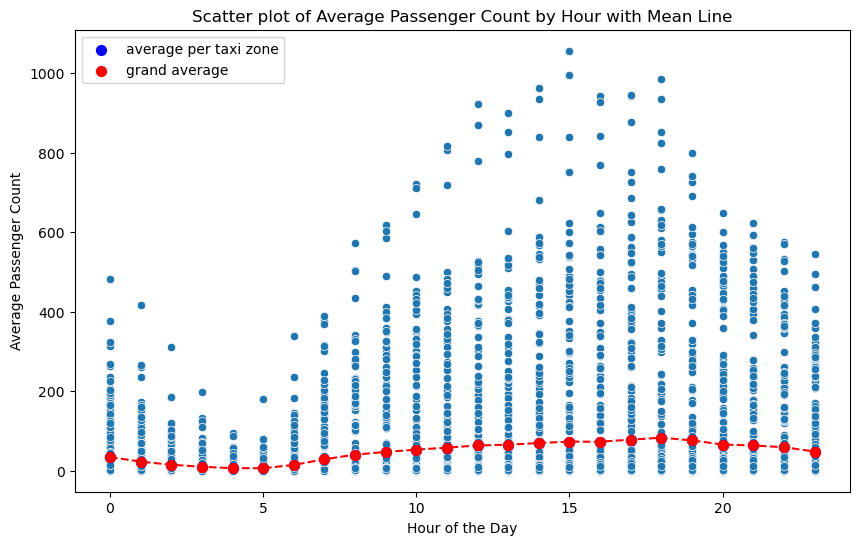

In [13]:
# Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='hour', y='passenger_count', data=grouped_taxi_hour)
# Calculate mean of passenger_count for each hour
mean_passenger_count = grouped_taxi_hour.groupby('hour')['passenger_count'].mean()

# Add circle marker to the different taxi zone values
plt.scatter(mean_passenger_count.index, mean_passenger_count.values, color='blue', s=50, label='average per taxi zone')



# Add mean line
plt.plot(mean_passenger_count.index, mean_passenger_count.values, color='red', linestyle='dashed')

# Add circle marker to the mean values
plt.scatter(mean_passenger_count.index, mean_passenger_count.values, color='red', s=50, label='grand average')

# Set plot title and labels
plt.title('Scatter plot of Average Passenger Count by Hour with Mean Line')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')

# Display legend
plt.legend()

plt.show()

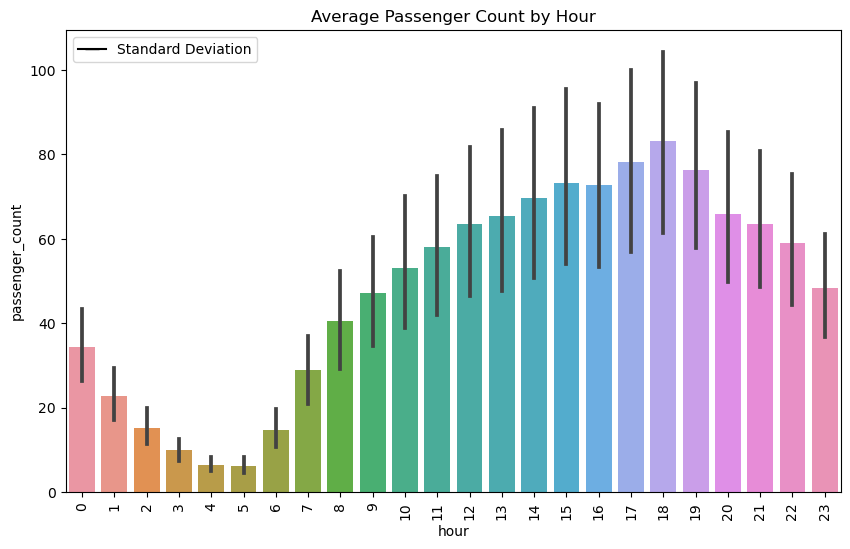

In [14]:
import matplotlib.lines as mlines

# Create the bar plot with error bars
plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='passenger_count', data=grouped_taxi_hour)

# Set the title and rotate the x-axis labels
plt.title('Average Passenger Count by Hour')
plt.xticks(rotation=90)

# Set the lower limit of y-axis to 0
plt.ylim(bottom=0)

# Create a line legend for the standard deviation
error_line = mlines.Line2D([], [], color='black', marker='_', markersize=10, label='Standard Deviation')

# Add the legend to the plot
plt.legend(handles=[error_line])

plt.show()

In [15]:


# Convert 'datetime' to datetime format if it's not already
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Create a new column 'date' by stripping hour information from 'datetime'
combined_df['date'] = combined_df['datetime'].dt.date

# Group by 'taxi_zone' and 'date', summing 'passenger_count', and average values for other columns
grouped_day = combined_df.groupby(['taxi_zone', 'date']).agg({
    'passenger_count': 'sum',
    'year_month': 'first',  # assuming this is non-numeric and we just need the first value
    'week': 'first',
    'borough': 'first',
    'entertainment_and_recreation': 'mean',
    'financial_services': 'mean',
    'food_and_beverage': 'mean',
    'parking_and_automotive_services': 'mean',
    'professional_services': 'mean',
    'real_estate': 'mean',
    'retail_services': 'mean',
    'transportation': 'mean',
    'hospital': 'mean',
    'hotspots': 'mean',
    'school': 'mean',
    'total_business': 'mean',
    'holiday': 'first'
}).reset_index()

grouped_day


,taxi_zone,date,passenger_count,year_month,week,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01,619,2022-01,5,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,New Year's Day
1,1,2022-01-02,684,2022-01,6,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,No
2,1,2022-01-03,508,2022-01,0,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,No
3,1,2022-01-04,311,2022-01,1,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,No
4,1,2022-01-05,260,2022-01,2,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126580,263,2023-04-26,5843,2023-04,2,Manhattan,69.0,0.0,0.0,37.0,11.0,116.0,108.0,5.000000,0.0,14.0,4.0,364.000000,No
126581,263,2023-04-27,5795,2023-04,3,Manhattan,69.0,0.0,0.0,37.0,11.0,116.0,108.0,5.000000,0.0,14.0,4.0,364.000000,No
126582,263,2023-04-28,7114,2023-04,4,Manhattan,69.0,0.0,0.0,37.0,11.0,116.0,108.0,5.000000,0.0,14.0,4.0,364.000000,No
126583,263,2023-04-29,7096,2023-04,5,Manhattan,69.0,0.0,0.0,37.0,11.0,116.0,108.0,5.000000,0.0,14.0,4.0,364.000000,No


In [16]:
# Group by 'taxi_zone' and 'week', average 'passenger_count',
grouped_week = grouped_day.groupby(['taxi_zone', 'week']).agg({
    'passenger_count': 'mean',
    'year_month': 'first',
    'borough': 'first',
    'entertainment_and_recreation': 'mean',
    'financial_services': 'mean',
    'food_and_beverage': 'mean',
    'parking_and_automotive_services': 'mean',
    'professional_services': 'mean',
    'real_estate': 'mean',
    'retail_services': 'mean',
    'transportation': 'mean',
    'hospital': 'mean',
    'hotspots': 'mean',
    'school': 'mean',
    'total_business': 'mean'
}).reset_index()


grouped_week

,taxi_zone,week,passenger_count,year_month,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,1,0,523.753623,2022-01,EWR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,1,1,427.159420,2022-01,EWR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,1,2,479.782609,2022-01,EWR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,1,3,551.289855,2022-01,EWR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,1,4,586.362319,2022-01,EWR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,263,2,6086.014493,2022-01,Manhattan,67.478261,0.811594,0.942029,37.753623,11.000000,115.492754,108.550725,4.434783,0.0,14.0,4.0,364.463768
1823,263,3,6401.855072,2022-01,Manhattan,67.312198,0.811594,0.928140,37.753623,10.986715,115.492754,108.594203,4.449275,0.0,14.0,4.0,364.328502
1824,263,4,6977.304348,2022-01,Manhattan,67.318841,0.811594,0.913647,37.726449,10.985507,115.492754,108.594203,4.449275,0.0,14.0,4.0,364.292271
1825,263,5,7347.914286,2022-01,Manhattan,67.400000,0.814286,0.928571,37.671429,11.014286,115.485714,108.517262,4.442857,0.0,14.0,4.0,364.274405


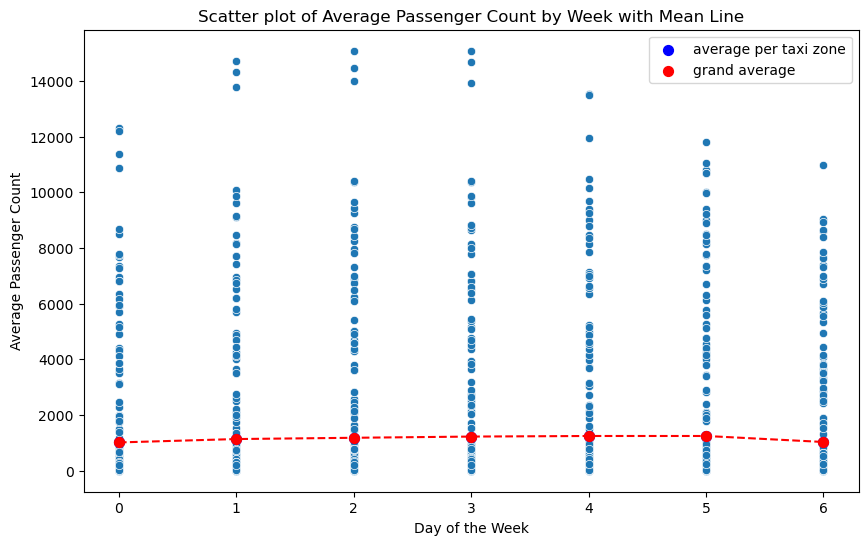

In [17]:
# Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='week', y='passenger_count', data=grouped_week)
# Calculate mean of passenger_count for each hour
mean_passenger_count = grouped_week.groupby('week')['passenger_count'].mean()
# Add circle marker to the different taxi zone values
plt.scatter(mean_passenger_count.index, mean_passenger_count.values, color='blue', s=50, label='average per taxi zone')



# Add mean line
plt.plot(mean_passenger_count.index, mean_passenger_count.values, color='red', linestyle='dashed')

# Add circle marker to the mean values
plt.scatter(mean_passenger_count.index, mean_passenger_count.values, color='red', s=50, label='grand average')

# Set plot title and labels
plt.title('Scatter plot of Average Passenger Count by Week with Mean Line')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')

# Display legend
plt.legend()

plt.show()


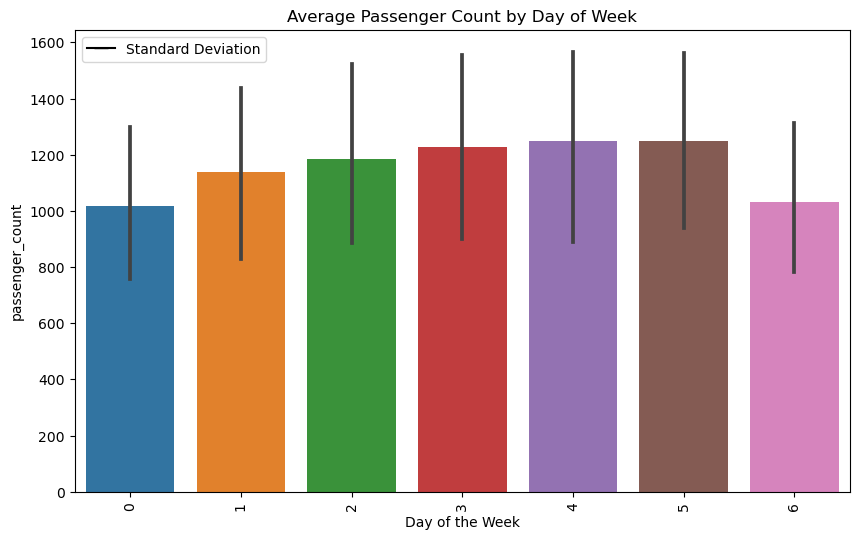

In [18]:
import matplotlib.lines as mlines

# Create the bar plot with error bars
plt.figure(figsize=(10,6))
sns.barplot(x='week', y='passenger_count', data=grouped_week)

# Set the title and rotate the x-axis labels
plt.title('Average Passenger Count by Day of Week')
plt.xticks(rotation=90)

# Set the lower limit of y-axis to 0
plt.ylim(bottom=0)

# Create a line legend for the standard deviation
error_line = mlines.Line2D([], [], color='black', marker='_', markersize=10, label='Standard Deviation')
plt.xlabel('Day of the Week')
# Add the legend to the plot
plt.legend(handles=[error_line])

plt.show()

In [19]:


# Group by 'taxi_zone', average 'passenger_count'
grouped_day_taxi_zone = grouped_week.groupby('taxi_zone').agg({
    
    'borough': 'first',
    'passenger_count': 'mean',
    'entertainment_and_recreation': 'mean',
    'financial_services': 'mean',
    'food_and_beverage': 'mean',
    'parking_and_automotive_services': 'mean',
    'professional_services': 'mean',
    'real_estate': 'mean',
    'retail_services': 'mean',
    'transportation': 'mean',
    'hospital': 'mean',
    'hotspots': 'mean',
    'school': 'mean',
    'total_business': 'mean',
}).reset_index()
grouped_day_taxi_zone

,taxi_zone,borough,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,1,EWR,536.794587,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,2,Queens,0.327655,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,3,Bronx,13.068175,2.000000,0.00000,0.000000,30.091428,20.956958,257.145748,52.064319,0.245456,0.0,0.0,6.0,368.503909
3,4,Manhattan,772.225643,41.079124,0.00000,0.000000,5.301121,19.255837,38.957044,39.415236,0.000000,0.0,0.0,9.0,153.008362
4,5,Staten Island,3.744070,1.000000,0.00000,0.000000,0.000000,0.742438,44.427719,7.000000,0.000000,0.0,0.0,2.0,55.170157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,259,Bronx,20.539071,2.183582,0.00000,0.000000,9.057993,11.371219,80.390516,88.081368,0.000000,0.0,3.0,5.0,199.084678
257,260,Queens,223.859243,25.113571,0.00000,0.000000,39.940651,26.321793,160.674815,142.945539,18.644443,0.0,16.0,4.0,433.640813
258,261,Manhattan,1547.440728,2.356758,6.44356,0.000000,4.455865,2.000000,9.000000,39.750632,0.245456,0.0,11.0,3.0,78.252271
259,262,Manhattan,4269.457853,1.000000,0.00000,0.000000,43.932754,2.000000,10.078406,55.732086,2.000000,0.0,0.0,1.0,115.743247


In [20]:
grouped_day_taxi_zone.dtypes

taxi_zone                          category
borough                            category
passenger_count                     float64
entertainment_and_recreation        float64
financial_services                  float64
food_and_beverage                   float64
parking_and_automotive_services     float64
professional_services               float64
real_estate                         float64
retail_services                     float64
transportation                      float64
hospital                            float64
hotspots                            float64
school                              float64
total_business                      float64
dtype: object

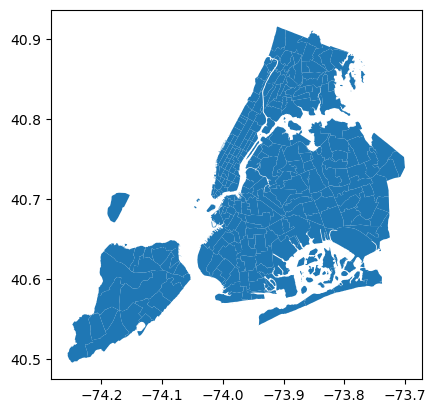

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the geojson file
gdf = gpd.read_file('NYC Taxi Zones.geojson')

# Plot the GeoDataFrame
gdf.plot()
plt.show()

In [22]:
gdf.dtypes
#gdf.tail()
#gdf['objectid'].max()

shape_area       object
objectid         object
shape_leng       object
location_id      object
zone             object
borough          object
geometry       geometry
dtype: object

In [23]:
grouped_day_taxi_zone['taxi_zone'] = grouped_day_taxi_zone['taxi_zone'].astype('object')
grouped_day_taxi_zone

# 263 unique values, min 1 max 265
# grouped_day_taxi_zone['taxi_zone'].max()

,taxi_zone,borough,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,1,EWR,536.794587,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,2,Queens,0.327655,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,3,Bronx,13.068175,2.000000,0.00000,0.000000,30.091428,20.956958,257.145748,52.064319,0.245456,0.0,0.0,6.0,368.503909
3,4,Manhattan,772.225643,41.079124,0.00000,0.000000,5.301121,19.255837,38.957044,39.415236,0.000000,0.0,0.0,9.0,153.008362
4,5,Staten Island,3.744070,1.000000,0.00000,0.000000,0.000000,0.742438,44.427719,7.000000,0.000000,0.0,0.0,2.0,55.170157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,259,Bronx,20.539071,2.183582,0.00000,0.000000,9.057993,11.371219,80.390516,88.081368,0.000000,0.0,3.0,5.0,199.084678
257,260,Queens,223.859243,25.113571,0.00000,0.000000,39.940651,26.321793,160.674815,142.945539,18.644443,0.0,16.0,4.0,433.640813
258,261,Manhattan,1547.440728,2.356758,6.44356,0.000000,4.455865,2.000000,9.000000,39.750632,0.245456,0.0,11.0,3.0,78.252271
259,262,Manhattan,4269.457853,1.000000,0.00000,0.000000,43.932754,2.000000,10.078406,55.732086,2.000000,0.0,0.0,1.0,115.743247


In [24]:
gdf.tail()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
258,0.000168611097013,256,0.0679149669603,256,Williamsburg (South Side),Brooklyn,"MULTIPOLYGON (((-73.95834 40.71331, -73.95681 ..."
259,0.000394552487366,259,0.126750305191,259,Woodlawn/Wakefield,Bronx,"MULTIPOLYGON (((-73.85107 40.91037, -73.85207 ..."
260,0.000422345326907,260,0.133514154636,260,Woodside,Queens,"MULTIPOLYGON (((-73.90175 40.76078, -73.90147 ..."
261,0.0000343423231652,261,0.0271204563616,261,World Trade Center,Manhattan,"MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ..."
262,0.000122330270966,262,0.0490636231541,262,Yorkville East,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


In [25]:
test = gdf.location_id.astype(float)
test.nunique()
test

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
258    256.0
259    259.0
260    260.0
261    261.0
262    262.0
Name: location_id, Length: 263, dtype: float64

In [27]:
import geopandas as gpd
from geopandas import GeoDataFrame
import folium
from folium.plugins import HeatMap


grouped_day_taxi_zone = grouped_day_taxi_zone.rename(columns={'borough': 'borough_grouped'})


# Merge GeoDataFrame and DataFrame
gdf['location_id'] = gdf['location_id'].astype('int')
merged = gdf.set_index('location_id').join(grouped_day_taxi_zone.set_index('taxi_zone'))
gdf['location_id'] = gdf['location_id'].astype('object')

merged

# add 1 for log transformation
merged['passenger_count'] = merged['passenger_count'] + 1

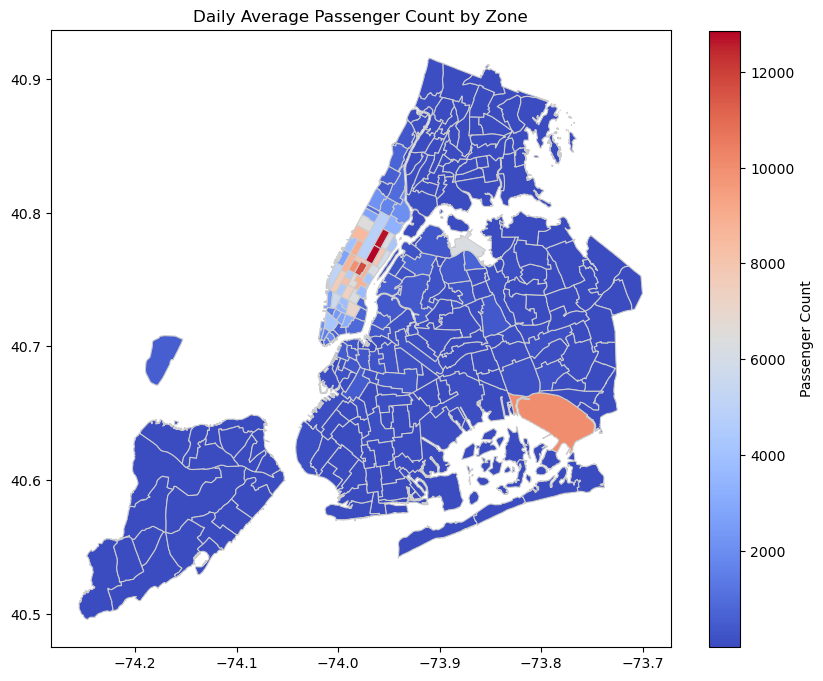

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged.plot(column='passenger_count', 
            cmap='coolwarm', 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            legend=True,
            legend_kwds={'label': "Passenger Count",
                         'orientation': "vertical",
                         'shrink': 0.8})

# Set the title
plt.title('Daily Average Passenger Count by Zone')
plt.show()


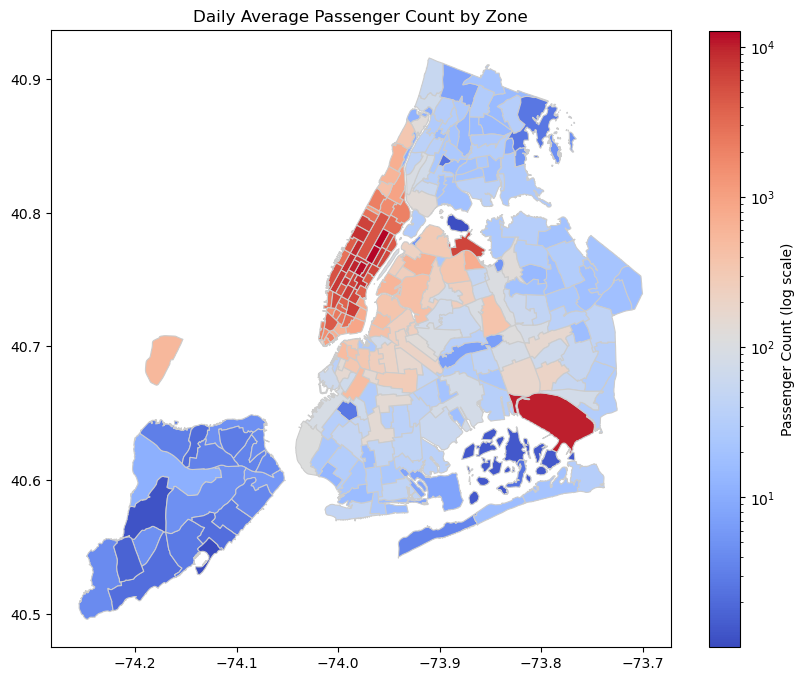

In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Use a logarithmic color scale
norm = colors.LogNorm(vmin=merged['passenger_count'].min(), vmax=merged['passenger_count'].max())

merged.plot(column='passenger_count', 
            cmap='coolwarm', 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            legend=True,
            norm=norm,
            legend_kwds={'label': "Passenger Count (log scale)",
                         'orientation': "vertical",
                         'shrink': 0.8})

# Set the title
plt.title('Daily Average Passenger Count by Zone')

plt.show()



In [30]:
grouped_day_taxi_zone.dtypes

taxi_zone                            object
borough_grouped                    category
passenger_count                     float64
entertainment_and_recreation        float64
financial_services                  float64
food_and_beverage                   float64
parking_and_automotive_services     float64
professional_services               float64
real_estate                         float64
retail_services                     float64
transportation                      float64
hospital                            float64
hotspots                            float64
school                              float64
total_business                      float64
dtype: object

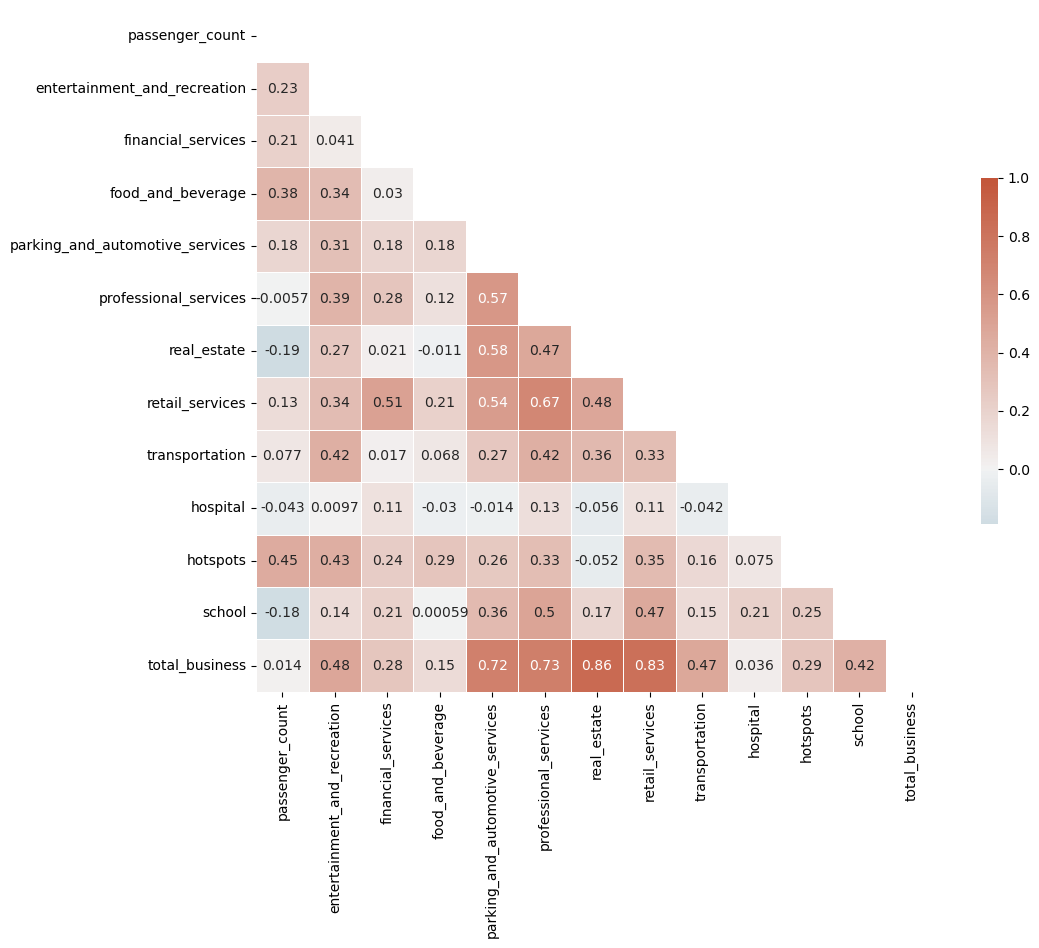

In [31]:
# Select only numeric columns
grouped_day_taxi_zone_numeric_cols = grouped_day_taxi_zone.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = grouped_day_taxi_zone_numeric_cols.corr()


# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

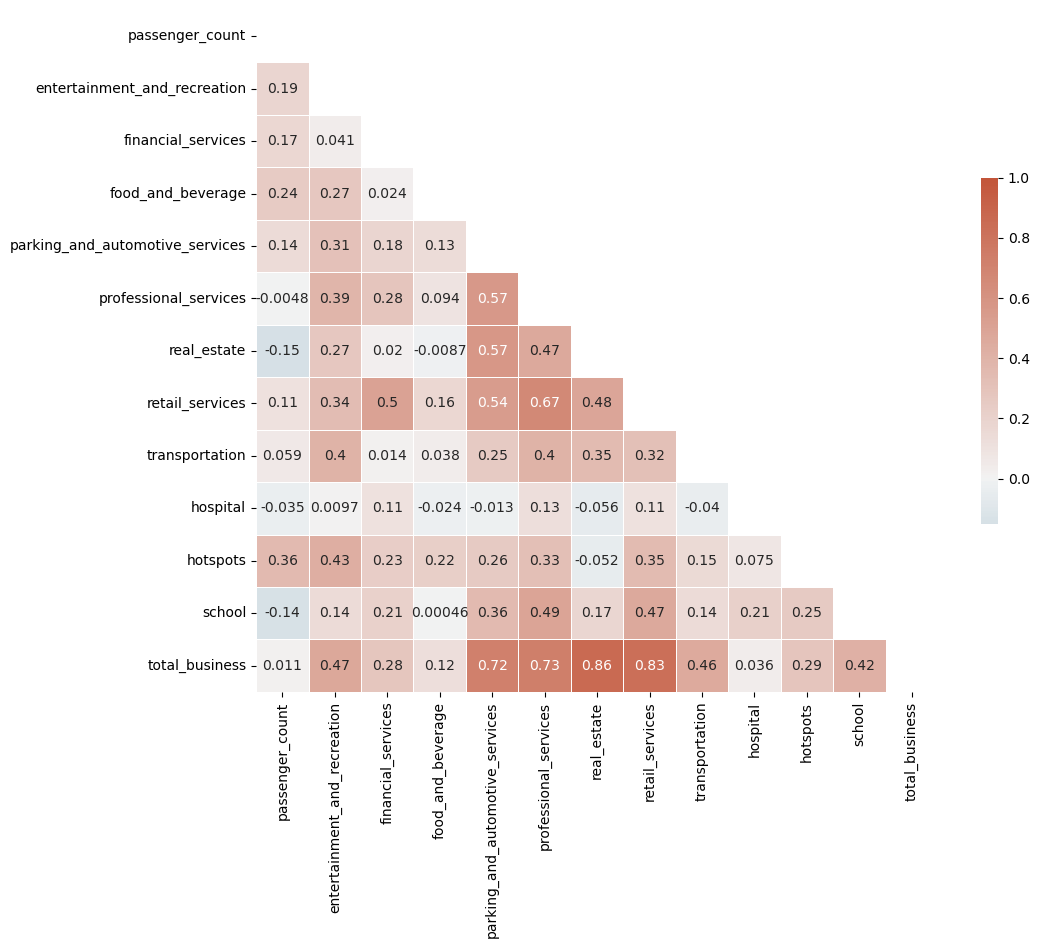

In [32]:
# Select only the numerical columns from the dataframe
combined_df_numerical_features = combined_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = combined_df_numerical_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


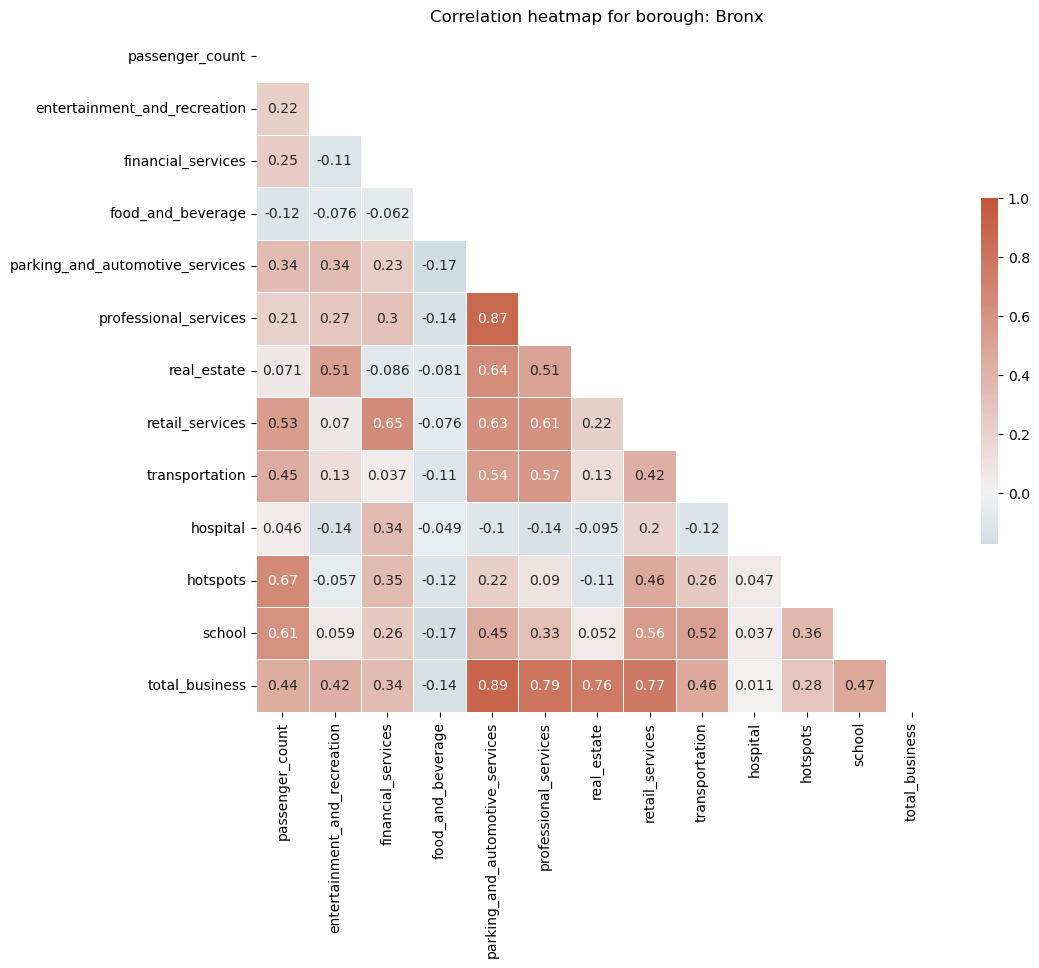

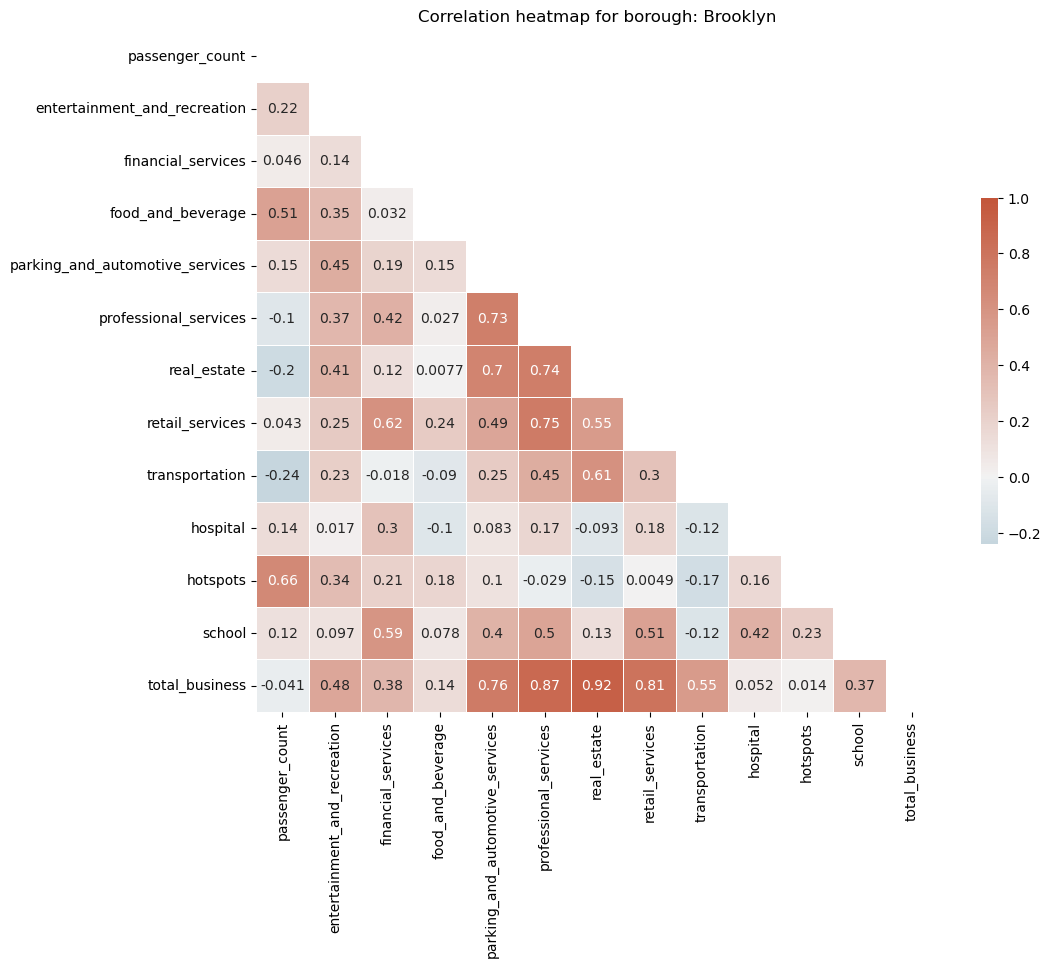

/Users/lalazhou/opt/anaconda3/envs/research_project/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


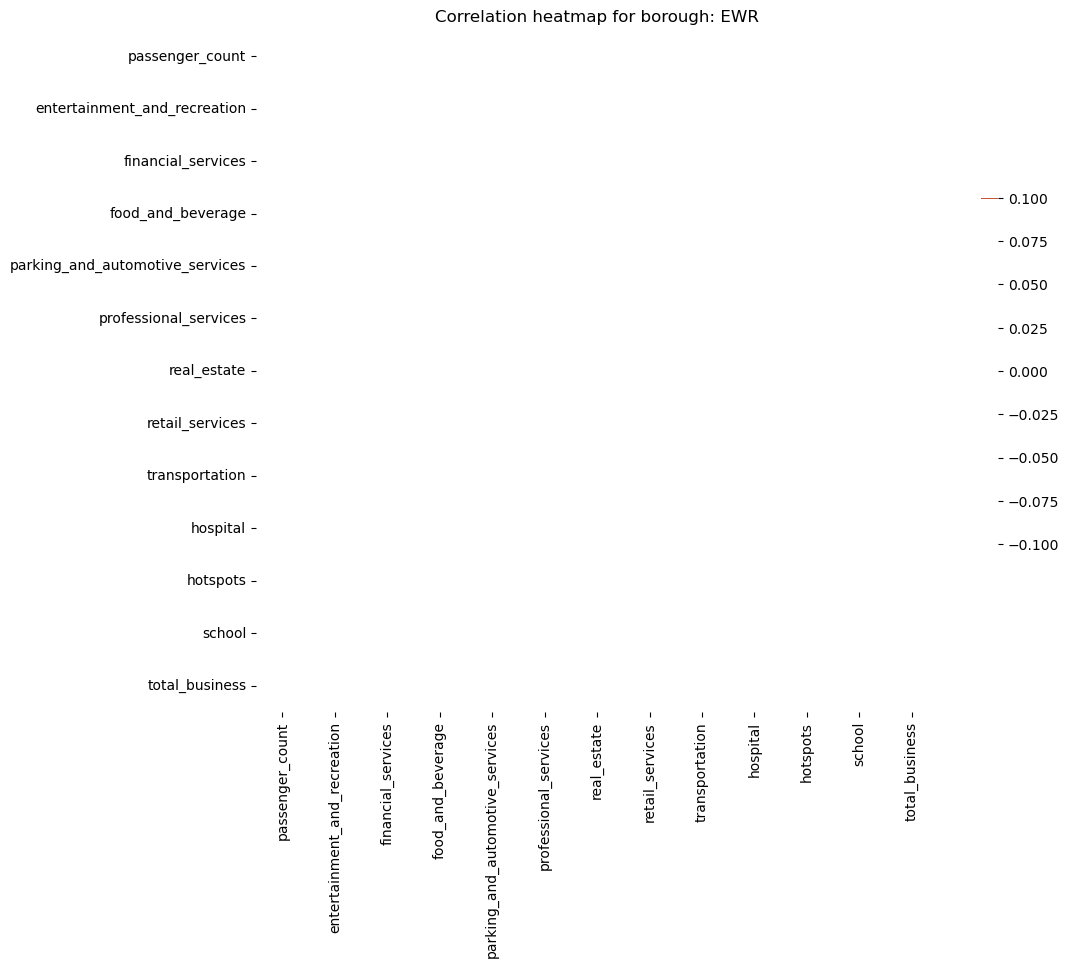

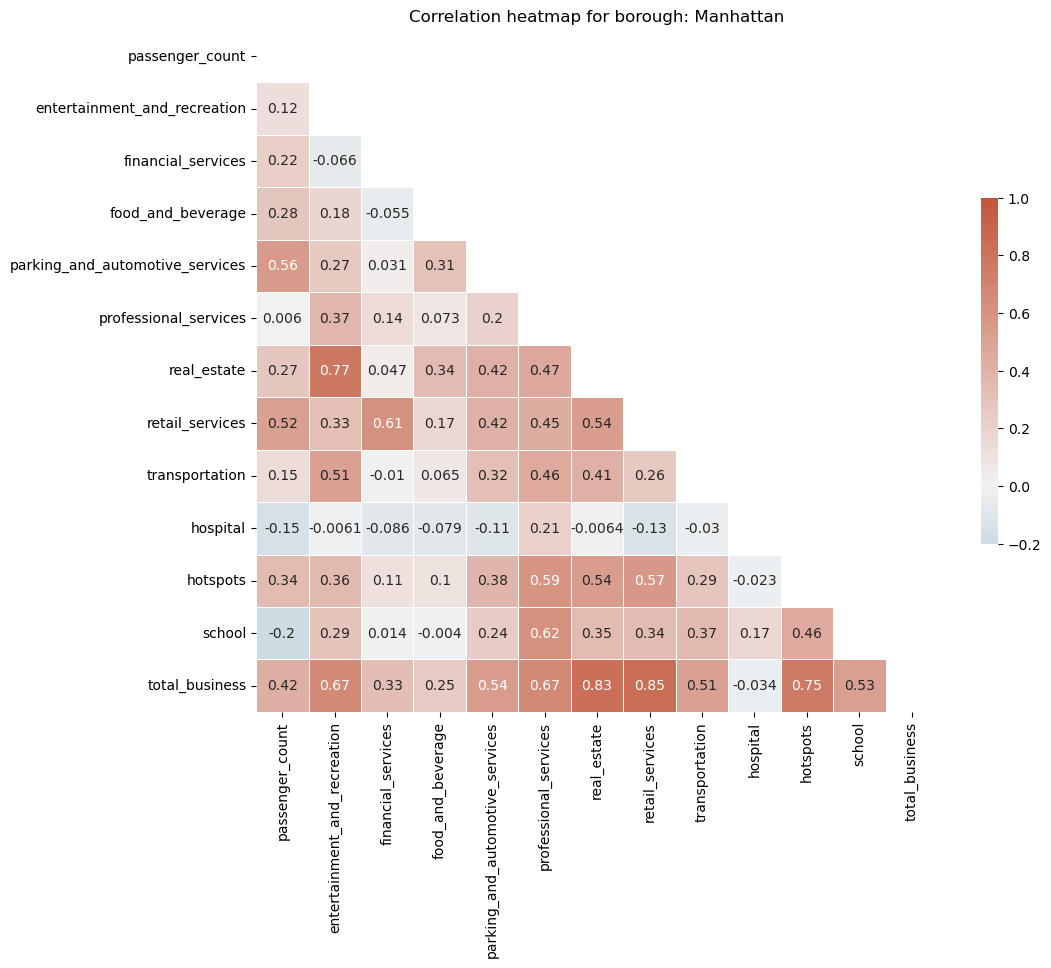

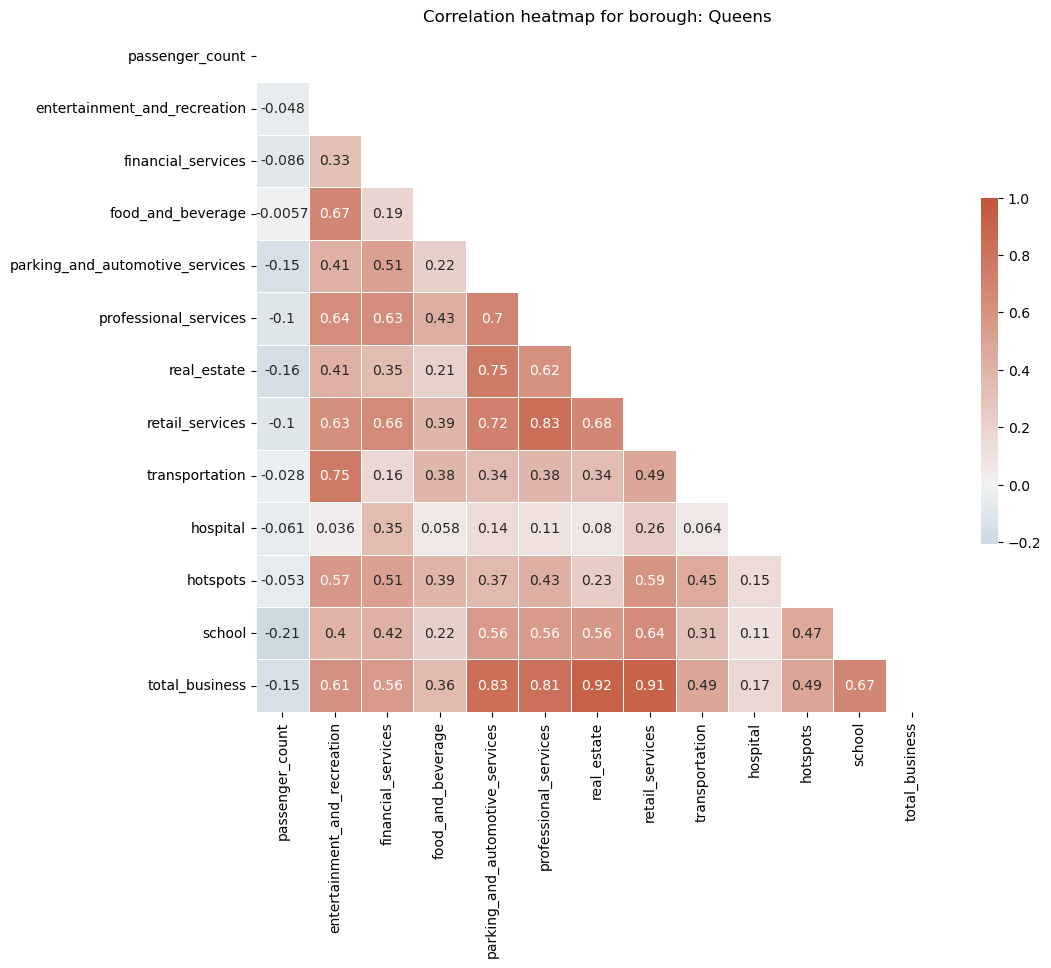

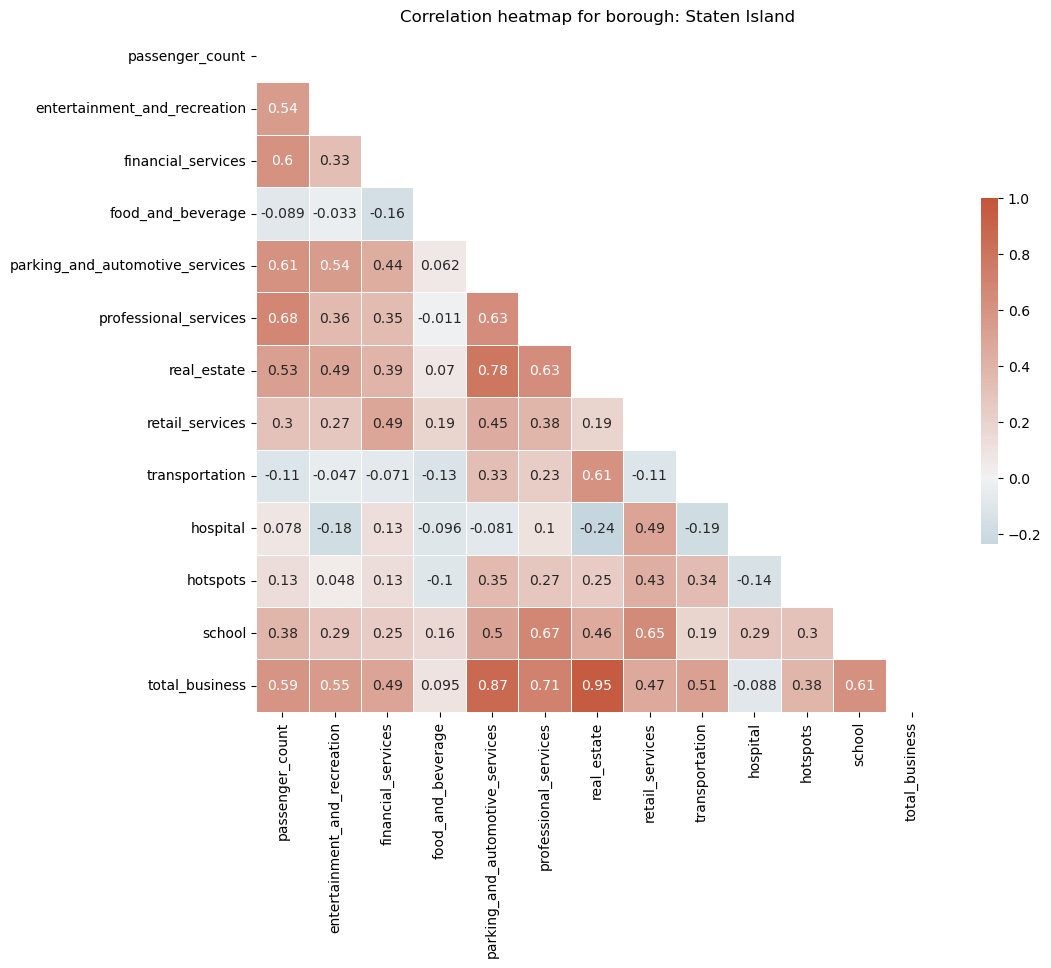

""


In [33]:
def plot_corr_heatmap(df):
    # Only include numerical columns in the correlation calculation
    numerical_df = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr = numerical_df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.title("Correlation heatmap for borough: " + df['borough'].iloc[0])
    plt.show()

# Group by borough and apply the function to each group
merged.groupby('borough').apply(plot_corr_heatmap)


In [34]:
grouped_day

,taxi_zone,date,passenger_count,year_month,week,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01,619,2022-01,5,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,New Year's Day
1,1,2022-01-02,684,2022-01,6,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,No
2,1,2022-01-03,508,2022-01,0,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,No
3,1,2022-01-04,311,2022-01,1,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,No
4,1,2022-01-05,260,2022-01,2,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126580,263,2023-04-26,5843,2023-04,2,Manhattan,69.0,0.0,0.0,37.0,11.0,116.0,108.0,5.000000,0.0,14.0,4.0,364.000000,No
126581,263,2023-04-27,5795,2023-04,3,Manhattan,69.0,0.0,0.0,37.0,11.0,116.0,108.0,5.000000,0.0,14.0,4.0,364.000000,No
126582,263,2023-04-28,7114,2023-04,4,Manhattan,69.0,0.0,0.0,37.0,11.0,116.0,108.0,5.000000,0.0,14.0,4.0,364.000000,No
126583,263,2023-04-29,7096,2023-04,5,Manhattan,69.0,0.0,0.0,37.0,11.0,116.0,108.0,5.000000,0.0,14.0,4.0,364.000000,No


In [40]:
grouped_day_borough_holiday = grouped_day.groupby(['holiday', 'borough']).agg({
    # 'borough': 'first',
    'passenger_count': 'mean',
    'entertainment_and_recreation': 'mean',
    'financial_services': 'mean',
    'food_and_beverage': 'mean',
    'parking_and_automotive_services': 'mean',
    'professional_services': 'mean',
    'real_estate': 'mean',
    'retail_services': 'mean',
    'transportation': 'mean',
    'hospital': 'mean',
    'hotspots': 'mean',
    'school': 'mean',
    'total_business': 'mean',
}).reset_index()
grouped_day_borough_holiday

,holiday,borough,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,Christmas Day,Bronx,24.000000,2.883721,1.976744,0.000000,17.511628,15.046512,53.883721,79.511628,1.930233,0.325581,7.348837,10.604651,191.023256
1,Christmas Day,Brooklyn,64.213115,9.131148,1.344262,0.049180,15.360656,15.918033,116.409836,107.377049,5.770492,0.426230,11.491803,9.573770,292.852459
2,Christmas Day,EWR,477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Christmas Day,Manhattan,1969.462687,14.805970,2.104478,0.089552,18.835821,13.522388,38.238806,82.074627,3.537313,0.358209,24.477612,5.447761,203.492537
4,Christmas Day,Queens,244.405797,6.840580,1.014493,0.028986,17.478261,12.826087,127.391304,85.405797,2.695652,0.159420,7.695652,5.637681,267.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Washington's Birthday,Brooklyn,102.360656,9.729508,1.303279,0.172131,15.795082,16.565574,114.393443,102.073770,4.532787,0.426230,11.491803,9.573770,286.057377
74,Washington's Birthday,EWR,597.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75,Washington's Birthday,Manhattan,3067.746269,15.694030,1.962687,0.410448,18.604478,14.268657,37.604478,79.201493,3.253731,0.358209,24.477612,5.447761,201.283582
76,Washington's Birthday,Queens,354.043478,7.442029,0.949275,0.057971,18.188406,13.405797,125.427536,81.188406,2.528986,0.159420,7.695652,5.637681,262.681159


In [42]:
# Get the unique values of the 'holiday' column
unique_holidays = grouped_day_borough_holiday['holiday'].unique()

# Print the unique values
unique_holidays


['Christmas Day', 'Christmas Day (Observed)', 'Columbus Day', 'Independence Day', 'Labor Day', ..., 'New Year's Day (Observed)', 'No', 'Thanksgiving', 'Veterans Day', 'Washington's Birthday']
Length: 13
Categories (13, object): ['Christmas Day', 'Christmas Day (Observed)', 'Columbus Day', 'Independence Day', ..., 'No', 'Thanksgiving', 'Veterans Day', 'Washington's Birthday']

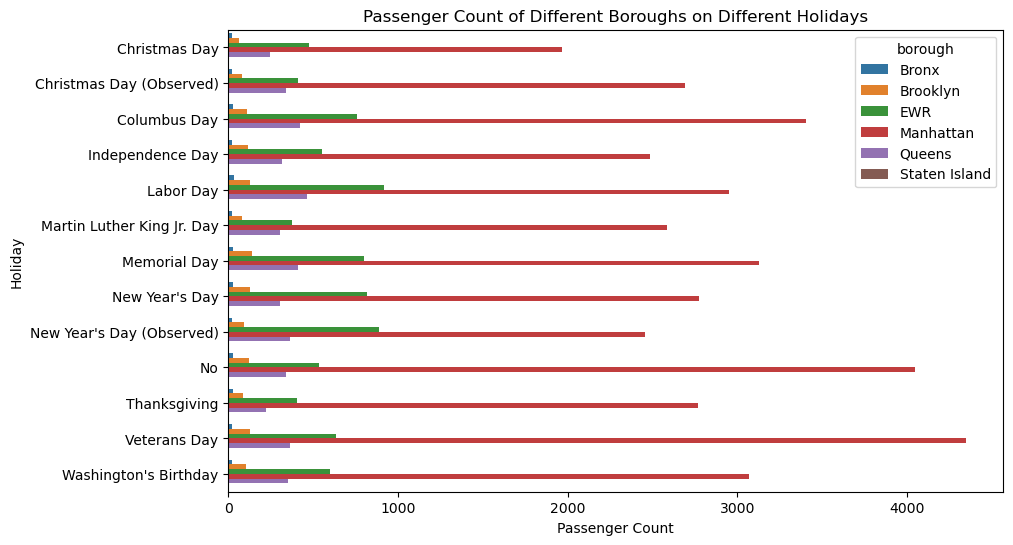

In [44]:
# Set the figure size
plt.figure(figsize=(10,6))

# Create barplot
sns.barplot(x='passenger_count', y='holiday', hue='borough', data=grouped_day_borough_holiday)

# Set the title and labels
plt.title('Passenger Count of Different Boroughs on Different Holidays')
plt.xlabel('Passenger Count')
plt.ylabel('Holiday')

# Show the plot
plt.show()


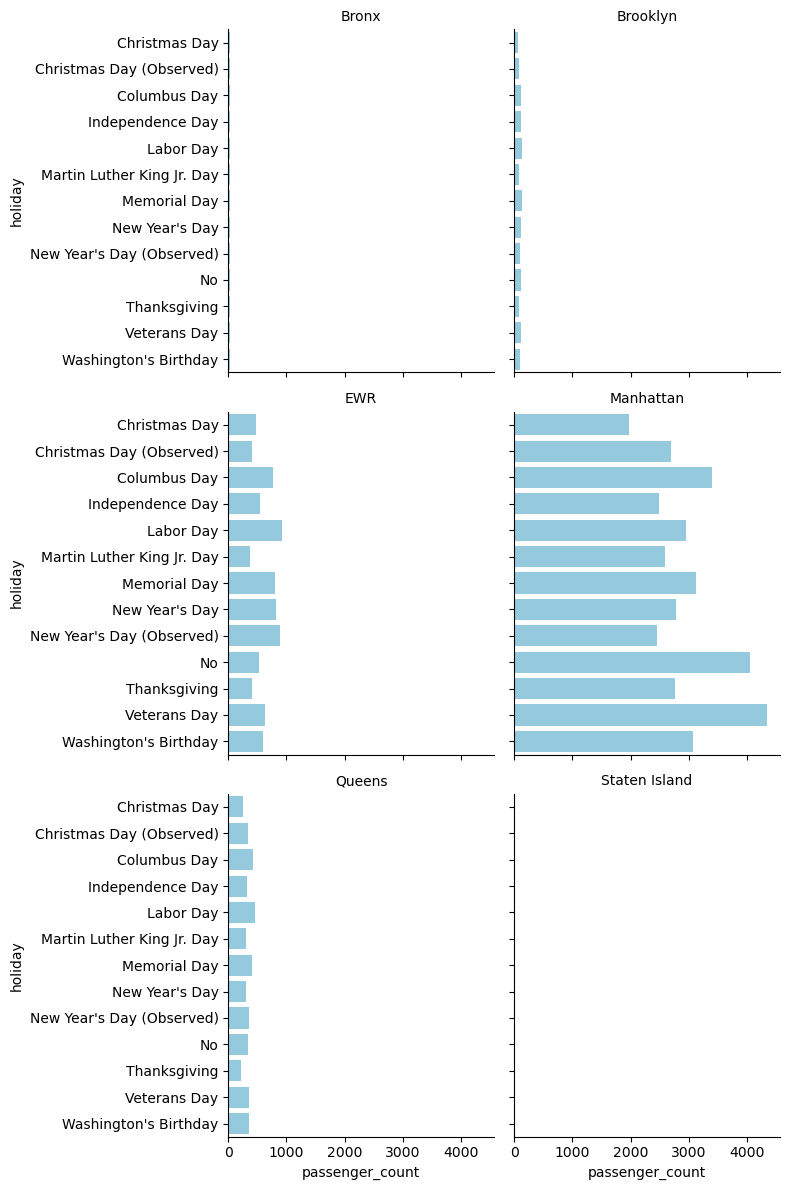

In [45]:
# Create a FacetGrid object
g = sns.FacetGrid(grouped_day_borough_holiday, col="borough", col_wrap=2, height=4)

# Map the barplots to the FacetGrid
g.map(sns.barplot, "passenger_count", "holiday", order=grouped_day_borough_holiday['holiday'].unique(), color='skyblue')

# Set the titles for each subplot
g.set_titles("{col_name}")

# Show the plots
plt.show()
